In [25]:
import sklearn
import pandas as pd
import mglearn
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
%matplotlib inline

x,y = mglearn.datasets.load_extended_boston()

x_train, x_test , y_train , y_test = train_test_split(x,y , random_state = 0)
ridge = Ridge().fit(x_train, y_train)

ridge.score(x_train, y_train)

ridge10 = Ridge(10).fit(x_train , y_train)
ridge01 = Ridge(0.1).fit(x_train , y_train)

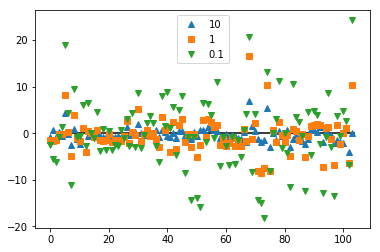

In [23]:
plt.plot(ridge10.coef_, '^', label = '10')
plt.plot(ridge.coef_, 's', label = '1')
plt.plot(ridge01.coef_, 'v', label = '0.1')

plt.legend()
plt.hlines(0,2,len(lr.coef_))

In [15]:
from sklearn.linear_model import Lasso

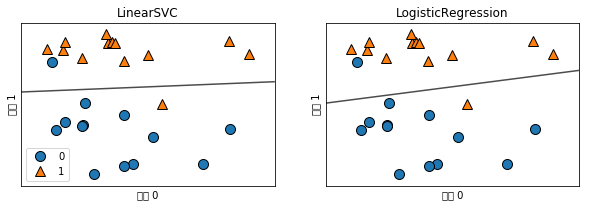

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

x,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize = (10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes) :
    clf = model.fit(x,y)
    mglearn.plots.plot_2d_separator(clf, x, fill = False , eps= 0.5, ax= ax , alpha = 0.7)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax =ax )
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

In [27]:
sp.linspace(-15, 15).shape

(50,)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train , x_test, y_train , y_test = train_test_split(cancer.data ,cancer.target, stratify = cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [34]:
tree.feature_importances_

array([0.        , 0.00752597, 0.        , 0.        , 0.00903116,
       0.        , 0.00752597, 0.        , 0.        , 0.        ,
       0.00975731, 0.04630969, 0.        , 0.00238745, 0.00231135,
       0.        , 0.        , 0.        , 0.        , 0.00668975,
       0.69546322, 0.05383211, 0.        , 0.01354675, 0.        ,
       0.        , 0.01740312, 0.11684357, 0.01137258, 0.        ])

In [35]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [37]:
cancer.data.shape[1]

30

<Container object of 30 artists>

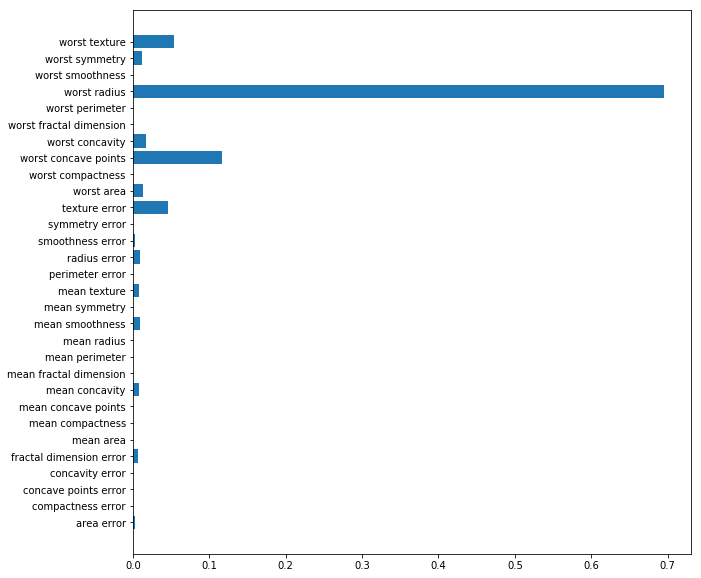

In [46]:
plt.figure(figsize = (10,10))
plt.barh(cancer.feature_names, tree.feature_importances_)

In [51]:
import numpy as np

df = pd.DataFrame({'key1' : ['a','a','b','b','a'], 
                   'key2' : ['one','two','one','two','one'], 
                   'data1' : np.random.randn(5), 
                   'data2' : np.random.randn(5)})

In [52]:
df

,data1,data2,key1,key2
0,2.094500,0.492191,a,one
1,-1.472525,1.263027,a,two
2,-0.657556,1.748185,b,one
3,-1.474630,1.191400,b,two
4,-0.057041,-1.255160,a,one


In [53]:
grouped = df['data1'].groupby(df['key1'])

In [54]:
grouped

In [56]:
grouped.max()

key1
a    2.094500
b   -0.657556
Name: data1, dtype: float64

In [57]:
df['data1']

0    2.094500
1   -1.472525
2   -0.657556
3   -1.474630
4   -0.057041
Name: data1, dtype: float64

In [58]:
df[['data1']]

,data1
0,2.094500
1,-1.472525
2,-0.657556
3,-1.474630
4,-0.057041


In [61]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [62]:
means

key1  key2
a     one     1.018730
      two    -1.472525
b     one    -0.657556
      two    -1.474630
Name: data1, dtype: float64

In [70]:
means.unstack('key1')

key1,a,b
key2,,
one,1.018730,-0.657556
two,-1.472525,-1.474630


In [71]:
df

,data1,data2,key1,key2
0,2.094500,0.492191,a,one
1,-1.472525,1.263027,a,two
2,-0.657556,1.748185,b,one
3,-1.474630,1.191400,b,two
4,-0.057041,-1.255160,a,one


In [73]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.188311,0.166686
b,-1.066093,1.469792


In [74]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [75]:
for name, group in df.groupby('key1') : 
    print(name)
    print(group)

a
      data1     data2 key1 key2
0  2.094500  0.492191    a  one
1 -1.472525  1.263027    a  two
4 -0.057041 -1.255160    a  one
b
      data1     data2 key1 key2
2 -0.657556  1.748185    b  one
3 -1.474630  1.191400    b  two


In [85]:
dict(list(df.groupby('key1')))

{'a':       data1     data2 key1 key2
 0  2.094500  0.492191    a  one
 1 -1.472525  1.263027    a  two
 4 -0.057041 -1.255160    a  one, 'b':       data1     data2 key1 key2
 2 -0.657556  1.748185    b  one
 3 -1.474630  1.191400    b  two}

In [91]:
dict(list(df.groupby(df.dtypes, axis =1 )))

{dtype('float64'):       data1     data2
 0  2.094500  0.492191
 1 -1.472525  1.263027
 2 -0.657556  1.748185
 3 -1.474630  1.191400
 4 -0.057041 -1.255160, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [92]:
df

,data1,data2,key1,key2
0,2.094500,0.492191,a,one
1,-1.472525,1.263027,a,two
2,-0.657556,1.748185,b,one
3,-1.474630,1.191400,b,two
4,-0.057041,-1.255160,a,one


In [101]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.381485
     two   1.263027
b    one   1.748185
     two   1.191400

In [104]:
df[['data2']].groupby([df['key1'],df['key2']]).mean()

data2
key1 key2          
a    one  -0.381485
     two   1.263027
b    one   1.748185
     two   1.191400

In [105]:
people = pd.DataFrame(sp.random.randn(5,5), 
                     columns = ['a','b','c','d','e'],
                    index = ['joe','steve','wes','jim','travis'])

In [106]:
people

,a,b,c,d,e
joe,1.205636,0.189480,0.031245,1.603306,1.958853
steve,-0.368009,-1.130433,0.697439,0.615375,-0.657512
wes,-0.623336,0.437292,0.740563,-0.582792,-0.902179
jim,1.162770,-0.478982,-0.580469,-0.220762,1.201329
travis,-1.451588,0.165775,1.727694,-0.500578,-0.819210


In [108]:
people.ix[2:3, ['b','c']] = sp.nan

In [109]:
people

,a,b,c,d,e
joe,1.205636,0.189480,0.031245,1.603306,1.958853
steve,-0.368009,-1.130433,0.697439,0.615375,-0.657512
wes,-0.623336,NaN,NaN,-0.582792,-0.902179
jim,1.162770,-0.478982,-0.580469,-0.220762,1.201329
travis,-1.451588,0.165775,1.727694,-0.500578,-0.819210


In [113]:
mapping = { 'a': 'red','b':'red','c':'blue', 'd':'blue', 'e':'red', 'f':'orange'}

In [114]:
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [115]:
by_column = people.groupby(mapping, axis =1)

In [116]:
by_column.sum()

,blue,red
joe,1.634552,3.353969
steve,1.312813,-2.155954
wes,-0.582792,-1.525515
jim,-0.801231,1.885117
travis,1.227116,-2.105023


In [117]:
people

,a,b,c,d,e
joe,1.205636,0.189480,0.031245,1.603306,1.958853
steve,-0.368009,-1.130433,0.697439,0.615375,-0.657512
wes,-0.623336,NaN,NaN,-0.582792,-0.902179
jim,1.162770,-0.478982,-0.580469,-0.220762,1.201329
travis,-1.451588,0.165775,1.727694,-0.500578,-0.819210


In [120]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.745069,-0.289501,-0.549224,0.799752,2.258003
5,-0.368009,-1.130433,0.697439,0.615375,-0.657512
6,-1.451588,0.165775,1.727694,-0.500578,-0.819210


In [121]:
df

,data1,data2,key1,key2
0,2.094500,0.492191,a,one
1,-1.472525,1.263027,a,two
2,-0.657556,1.748185,b,one
3,-1.474630,1.191400,b,two
4,-0.057041,-1.255160,a,one


In [123]:
grouped = df.groupby('key1')

In [124]:
grouped['data1'].quantile(0.9)

key1
a    1.664192
b   -0.739264
Name: data1, dtype: float64

In [126]:
grouped.describe().stack()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean   0.188311  0.166686
     std    1.796125  1.290264
     min   -1.472525 -1.255160
     25%   -0.764783 -0.381485
     50%   -0.057041  0.492191
     75%    1.018730  0.877609
     max    2.094500  1.263027
b    count  2.000000  2.000000
     mean  -1.066093  1.469792
     std    0.577758  0.393706
     min   -1.474630  1.191400
     25%   -1.270361  1.330596
     50%   -1.066093  1.469792
     75%   -0.861825  1.608988
     max   -0.657556  1.748185

In [127]:
df

,data1,data2,key1,key2
0,2.094500,0.492191,a,one
1,-1.472525,1.263027,a,two
2,-0.657556,1.748185,b,one
3,-1.474630,1.191400,b,two
4,-0.057041,-1.255160,a,one


In [129]:
-0.657556 -  -1.474630

0.8170740000000001

In [130]:
def a(arr) :
    return arr.max() - arr.min()

In [131]:
grouped.agg(a)

,data1,data2
key1,,
a,3.567025,2.518187
b,0.817073,0.556784


In [132]:
df

,data1,data2,key1,key2
0,2.094500,0.492191,a,one
1,-1.472525,1.263027,a,two
2,-0.657556,1.748185,b,one
3,-1.474630,1.191400,b,two
4,-0.057041,-1.255160,a,one


In [133]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [134]:
k1_means

,mean_data1,mean_data2
key1,,
a,0.188311,0.166686
b,-1.066093,1.469792


In [138]:
pd.merge(df, k1_means, left_on= 'key1',right_index= True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,2.094500,0.492191,a,one,0.188311,0.166686
1,-1.472525,1.263027,a,two,0.188311,0.166686
4,-0.057041,-1.255160,a,one,0.188311,0.166686
2,-0.657556,1.748185,b,one,-1.066093,1.469792
3,-1.474630,1.191400,b,two,-1.066093,1.469792


In [139]:
df

,data1,data2,key1,key2
0,2.094500,0.492191,a,one
1,-1.472525,1.263027,a,two
2,-0.657556,1.748185,b,one
3,-1.474630,1.191400,b,two
4,-0.057041,-1.255160,a,one


In [140]:
key = [ 'one' ,' two', 'one','two','one']

In [141]:
people.groupby(key).mean()

,a,b,c,d,e
two,-0.368009,-1.130433,0.697439,0.615375,-0.657512
one,-0.289763,0.177628,0.879470,0.173312,0.079154
two,1.162770,-0.478982,-0.580469,-0.220762,1.201329


In [142]:
people

,a,b,c,d,e
joe,1.205636,0.189480,0.031245,1.603306,1.958853
steve,-0.368009,-1.130433,0.697439,0.615375,-0.657512
wes,-0.623336,NaN,NaN,-0.582792,-0.902179
jim,1.162770,-0.478982,-0.580469,-0.220762,1.201329
travis,-1.451588,0.165775,1.727694,-0.500578,-0.819210


In [145]:
from pandas import DataFrame, Series
s= Series(sp.random.randn(6))

In [146]:
s

0   -0.789210
1   -1.495148
2    0.987594
3    0.396848
4   -0.392371
5   -0.763915
dtype: float64

In [147]:
s[::2] = sp.nan

In [150]:
s.mean()

-0.6207385541846646

In [149]:
s.fillna(s.mean())

0   -0.620739
1   -1.495148
2   -0.620739
3    0.396848
4   -0.620739
5   -0.763915
dtype: float64

In [151]:
states = ['ohio','new york','vermont','florida','oregon','nevada','california','idaho']

In [152]:
group_key = ['east'] * 4 + ['west'] * 4 

In [153]:
data = Series(np.random.randn(8), index = states) 

In [154]:
data[['vermont','nevada','idaho']] = sp.nan

In [155]:
data

ohio          0.885985
new york     -0.795344
vermont            NaN
florida       0.725974
oregon       -0.037622
nevada             NaN
california    2.681066
idaho              NaN
dtype: float64

In [156]:
data.groupby(group_key).mean()

east    0.272205
west    1.321722
dtype: float64

In [158]:
data.groupby(group_key).apply(lambda x : x.fillna(x.mean()))

ohio          0.885985
new york     -0.795344
vermont       0.272205
florida       0.725974
oregon       -0.037622
nevada        1.321722
california    2.681066
idaho         1.321722
dtype: float64

In [161]:
tips = pd.read_csv("C:/Users/SS/Desktop/P00000001-ALL.csv")
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [165]:
tips.pivot_table(index = ['smoker','day'], columns = 'size',margins = True)

tip                                                        \
size              1         2         3         4      5      6       All   
smoker day                                                                  
No     Fri      NaN  2.750000  3.000000       NaN    NaN    NaN  2.812500   
       Sat   1.0000  2.563200  3.412500  4.800000    NaN    NaN  3.102889   
       Sun      NaN  2.582222  2.937273  3.962500  5.070  5.000  3.167895   
       Thur  1.8300  2.341714  1.770000  4.030000  5.000  5.300  2.673778   
Yes    Fri   1.9200  2.620000       NaN  4.730000    NaN    NaN  2.714000   
       Sat   1.0000  2.476786  4.568333  3.335000  3.000    NaN  2.875476   
       Sun      NaN  3.345000  3.625000  5.090000  2.000    NaN  3.516842   
       Thur     NaN  2.713846  3.615000  4.500000    NaN    NaN  3.030000   
All          1.4375  2.582308  3.393158  4.135405  4.028  5.225  2.998279   

            total_bill                                                      \
size                 1          2          3          4       5          6   
smoker day                                                                   
No     Fri         NaN  19.233333  15.980000        NaN     NaN        NaN   
       Sat      7.2500  16.026400  21.962500  30.474286     NaN        NaN   
       Sun         NaN  15.642222  20.478182  26.410625  25.270  48.170000   
       Thur    10.0700  14.288857  20.730000  28.703333  41.190  30.383333   
Yes    Fri      8.5800  15.650000        NaN  40.170000     NaN        NaN   
       Sat      3.0700  17.561071  32.603333  29.178333  28.150        NaN   
       Sun         NaN  21.875000  26.875000  28.910000  30.460        NaN   
       Thur        NaN  17.493846  17.590000  31.820000     NaN        NaN   
All             7.2425  16.448013  23.277632  28.613514  30.068  34.830000   

                        
size               All  
smoker day              
No     Fri   18.420000  
       Sat   19.661778  
       Sun   20.506667  
       Thur  17.113111  
Yes    Fri   16.813333  
       Sat   21.276667  
       Sun   24.120000  
       Thur  19.190588  
All          19.785943

In [166]:
fec = pd.read_csv("C:/Users/SS/Desktop/P00000001-ALL.csv")

C:\Users\SS\Anaconda31\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [167]:
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [168]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [169]:
fec.ix[123456]

C:\Users\SS\Anaconda31\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [175]:
unique_cands = fec.cand_nm.unique()

In [176]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [179]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [180]:
fec = fec[fec.contb_receipt_amt > 0]

In [181]:
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [182]:
fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1001696    False
1001697    False
1001698    False
1001699    False
1001700    False
1001701    False
1001702    False
1001705    False
1001706    False
1001708    False
1001711    False
1001712    False
1001713    False
1001714    False
1001715    False
1001716    False
1001717    False
1001718    False
1001719    False
1001720    False
1001721    False
1001722    False
1001723    False
1001724    False
1001725    False
1001726    False
1001727    False
1001728    Fal

In [194]:
a = Series([1,2,3])
b= Series([1,2,4])

In [195]:
a.isin([1,2,4])

0     True
1     True
2    False
dtype: bool

In [196]:
by_occupation = fec.pivot_table('contb_receipt_amt', index = 'contbr_occupation', columns = 'party', aggfunc = 'sum')

KeyError: 'party'

# 비지도 학습과 데이터 전처리

In [199]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

x_train , x_test , y_train , y_test = train_test_split(cancer.data, cancer.target, random_state =1 )

print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [200]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [201]:
x_train_scaled = scaler.transform(x_train)

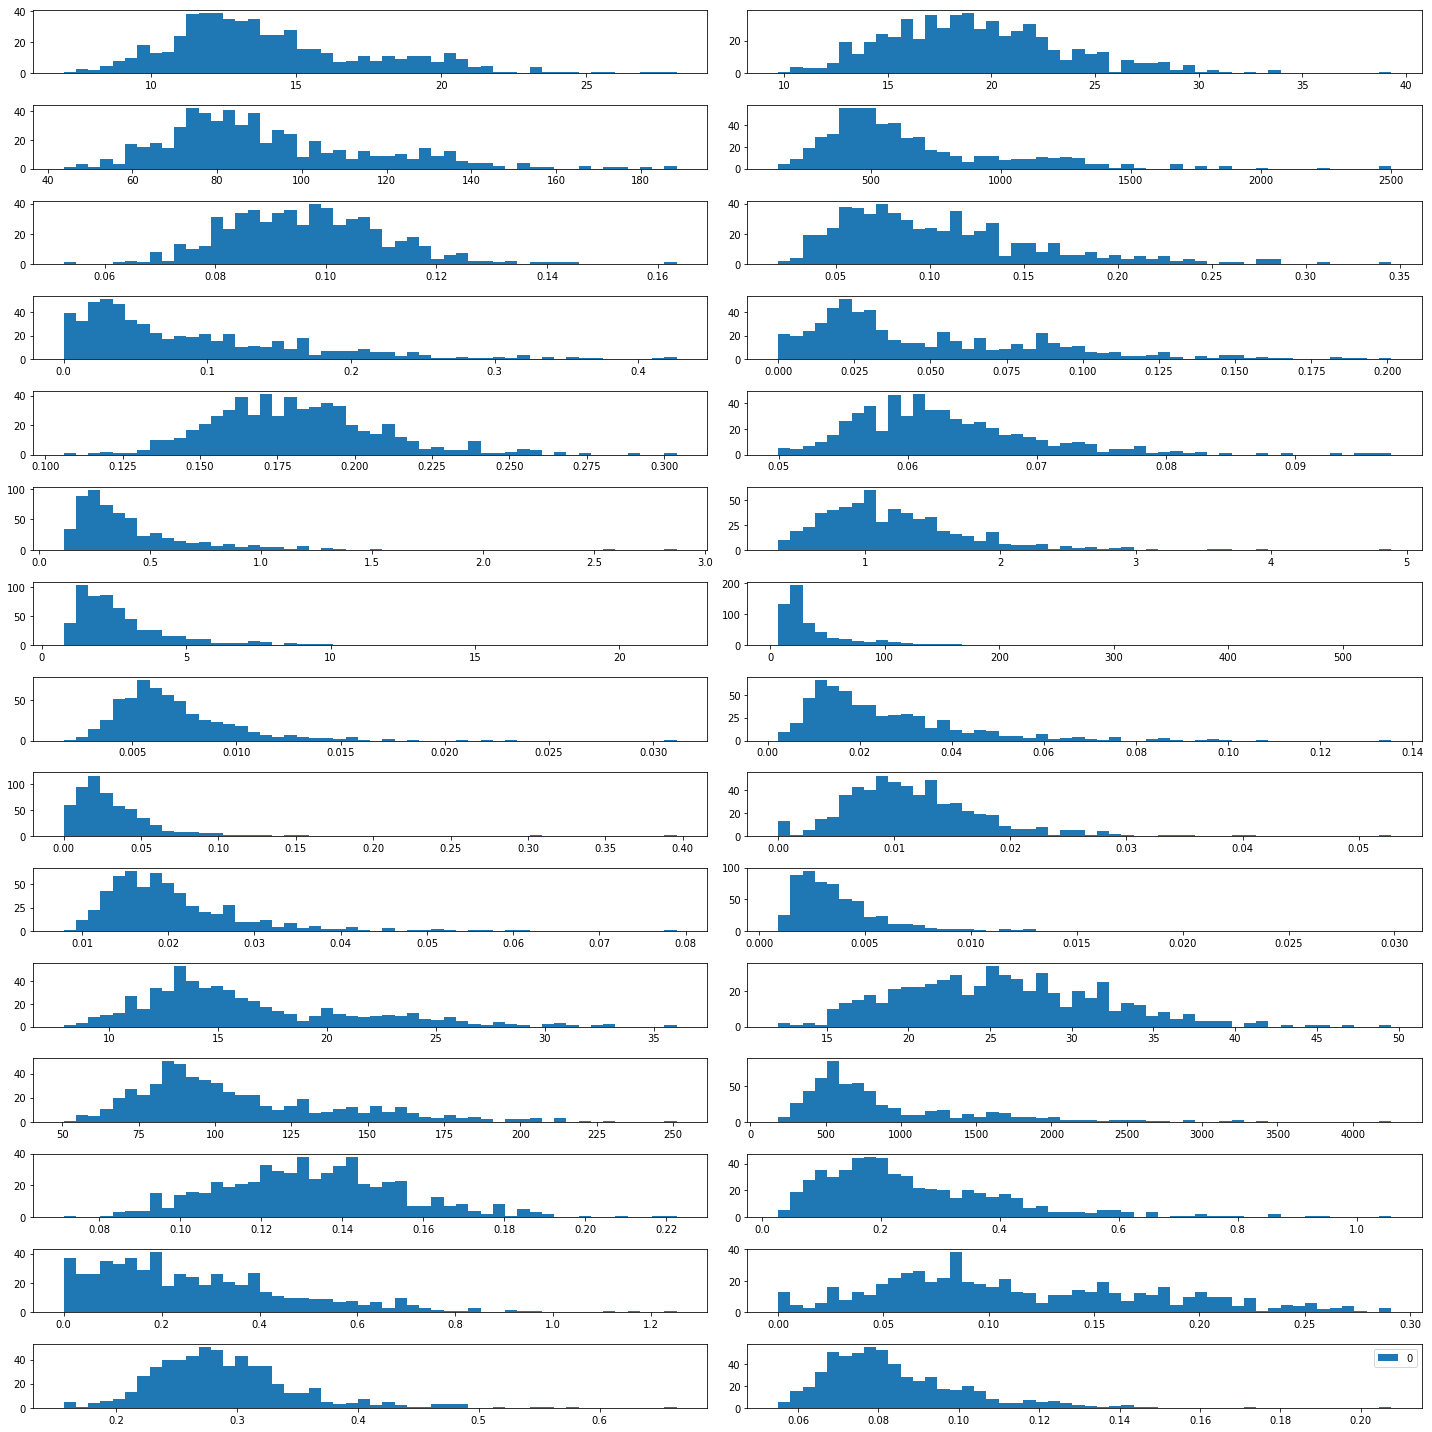

In [235]:
fig , axes = plt.subplots(15,2 , figsize= (20,20))

k=0

for i in range(15) :
    for j in range(2): 
        
        axes[i,j].hist(cancer.data[:,k], bins = 50, label = cancer.target)
       
        k = k+1
        
fig.tight_layout()
plt.legend()

No handles with labels found to put in legend.


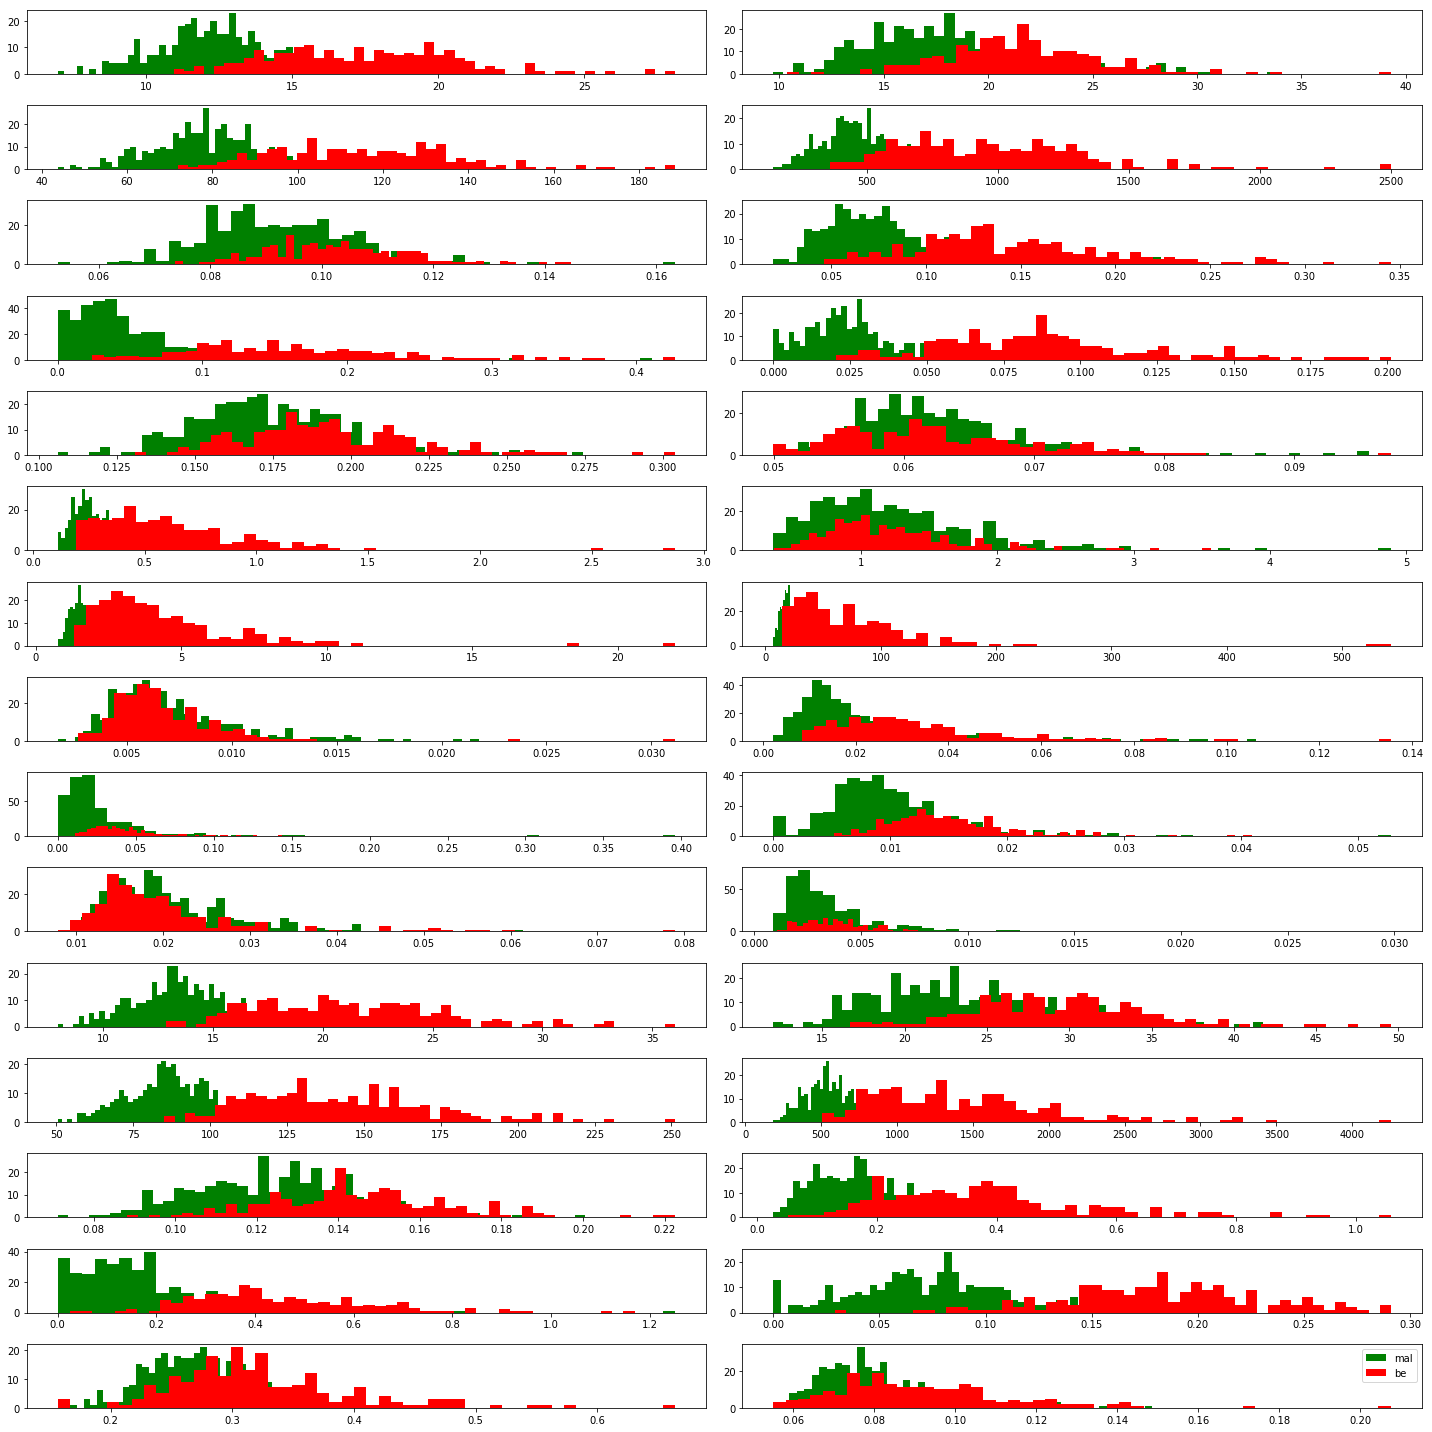

In [264]:
fig , axes = plt.subplots(15,2 , figsize= (20,20))

k = 0
 
for i in range(15) :
    for j in range(2): 

        axes[i,j].hist(malignant[:, k], bins = 50 ,  color = 'g' , label = 'mal')
        axes[i,j].hist(benign[:, k],  bins = 50 ,color = 'r' , label = 'be')
        
        
        k = k+1

plt.legend(loc = 'best')  
fig.tight_layout()


In [252]:
malignant = cancer.data[cancer.target == 1 ]

In [253]:
benign = cancer.data[cancer.target == 0 ]

In [243]:
malignant

(357, 30)

In [244]:
benign

(212, 30)

In [267]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()


StandardScaler().fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

In [276]:
x_scaled.shape

(569, 30)

In [293]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
pca.fit(x_scaled) 

x_pca = pca.transform(x_scaled)

In [282]:
x_pca.shape

(569, 2)

No handles with labels found to put in legend.


Text(0.5,0,'1st component')

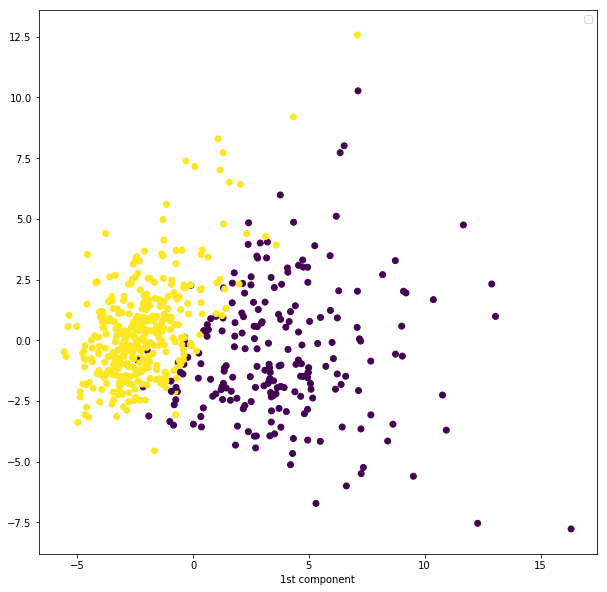

In [342]:
plt.figure(figsize = (10,10))
plt.scatter( x_pca[:,0], x_pca[:,1], c= cancer.target)
plt.legend()
plt.xlabel('1st component')

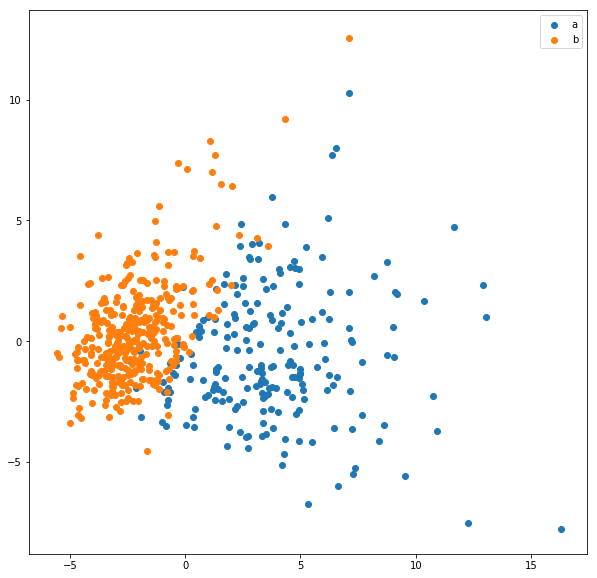

In [355]:
plt.figure(figsize = (10,10))
plt.scatter(x_pca[:,0][cancer.target ==0],x_pca[:,1][cancer.target ==0], label= 'a')
plt.scatter(x_pca[:,0][cancer.target ==1],x_pca[:,1][cancer.target ==1], label ='b')
plt.legend()

In [357]:
pca.components_.shape

(2, 30)

In [358]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x,y = make_blobs(random_state = 1)

kmeans = KMeans(n_clusters =3 )
kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [359]:
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [361]:
x.shape

(100, 2)

In [362]:
y.shape

(100,)

In [364]:
kmeans.predict(x)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

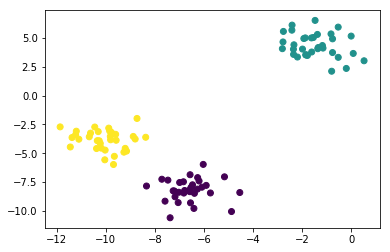

In [370]:
kmeans = KMeans(n_clusters=3).fit(x)
plt.scatter(x[:,0], x[:,1], c = kmeans.labels_)

In [371]:
kmeans.cluster_centers_

array([[ -6.58196786,  -8.17239339],
       [ -1.4710815 ,   4.33721882],
       [-10.04935243,  -3.85954095]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b'],
 'dcoord': [[0.0, 0.3862827352248835, 0.3862827352248835, 0.0],
  [0.0, 0.6638351379239946, 0.6638351379239946, 0.3862827352248835],
  [0.0, 0.03827136560701977, 0.03827136560701977, 0.0],
  [0.0, 0.18825057852860616, 0.18825057852860616, 0.03827136560701977],
  [0.0, 0.1575078370046222, 0.1575078370046222, 0.0],
  [0.0, 0.7655350373795081, 0.7655350373795081, 0.0],
  [0.1575078370046222,
   0.9383379035854348,
   0.9383379035854348,
   0.7655350373795081],
  [0.18825057852860616,
   1.8139806240344454,
   1.8139806240344454,
   0.9383379035854348],
  [0.0, 2.246762661048284, 2.246762661048284, 1.8139806240344454],
  [0.66383513792399

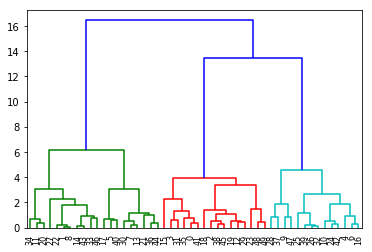

In [373]:
from scipy.cluster.hierarchy import dendrogram, ward ,complete

x,y = make_blobs(random_state = 0 , n_samples = 50)

linkage_array = ward(x)
dendrogram(linkage_array)

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b'],
 'dcoord': [[0.0, 0.03827136560701977, 0.03827136560701977, 0.0],
  [0.0, 0.1807542556174883, 0.1807542556174883, 0.03827136560701977],
  [0.0, 0.33516600631514226, 0.33516600631514226, 0.0],
  [0.1807542556174883,
   0.9107356669466375,
   0.9107356669466375,
   0.33516600631514226],
  [0.0, 0.22068325479594353, 0.22068325479594353, 0.0],
  [0.0, 0.491400247182991, 0.491400247182991, 0.22068325479594353],
  [0.0, 1.0540169443838696, 1.0540169443838696, 0.491400247182991],
  [0.9107356669466375,
   1.627231763897219,
   1.627231763897219,
   1.0540169443838696],
  [0.0, 0.3862827352248835, 0.3862827352248835, 0.0],
  [0.0, 0.623814512

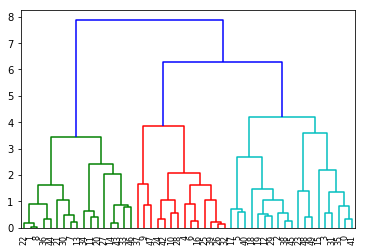

In [374]:
linkage_array = complete(x)
dendrogram(linkage_array)

In [375]:
x,y = mglearn.datasets.make_wave(n_samples= 100)

In [377]:
x.shape

(100, 1)

In [379]:
y.shape

(100,)

In [380]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 10 , include_bias = False)
poly.fit(x)
x_poly = poly.transform(x)


In [382]:
x_poly.shape

(100, 10)

In [384]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

In [385]:
rnd = np.random.RandomState(0)
x_org = rnd.normal(size = (1000,3))
w = rnd.normal(size =3)

In [391]:
rnd.normal(size = 3)

array([-1.21085564, -0.39373371,  0.08525257])

In [399]:
x = rnd.poisson(10* np.exp(x_org))
y = np.dot(x_org, w )

In [396]:
x.shape

(1000, 3)

([array([808., 138.,  32.,  15.,   5.,   0.,   2.,   0.,   0.,   0.]),
  array([796., 141.,  42.,   9.,   4.,   4.,   3.,   0.,   0.,   1.]),
  array([802., 141.,  35.,  12.,   6.,   3.,   0.,   1.,   0.,   0.])],
 array([  0. ,  22.8,  45.6,  68.4,  91.2, 114. , 136.8, 159.6, 182.4,
        205.2, 228. ]),
 <a list of 3 Lists of Patches objects>)

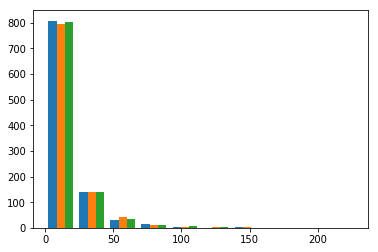

In [400]:
plt.hist(x, bins =10)

([array([ 23.,  42., 166., 165., 248., 192., 107.,  40.,  15.,   2.]),
  array([ 18.,  52., 165., 159., 254., 186.,  96.,  52.,  13.,   5.]),
  array([ 20.,  46., 175., 183., 230., 177., 109.,  44.,  15.,   1.])],
 array([0.       , 0.5433722, 1.0867444, 1.6301166, 2.1734888, 2.716861 ,
        3.2602332, 3.8036054, 4.3469776, 4.8903498, 5.433722 ]),
 <a list of 3 Lists of Patches objects>)

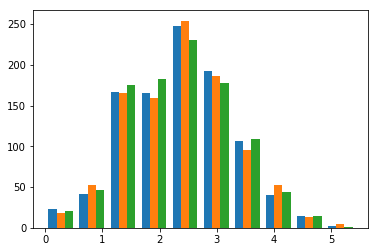

In [406]:
plt.hist(np.log(x+1), bins =10)

In [416]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target ,cv = 3)

In [418]:
scores

array([0.96078431, 0.92156863, 0.95833333])

In [414]:
from sklearn.model_selection import cross_val_predict

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_predict(logreg, iris.data, iris.target ,cv = 5)

In [415]:
scores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [420]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 3)

cross_val_score(logreg, iris.data, iris.target, cv = kfold)

array([0., 0., 0.])

In [422]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits =3)

cross_val_score(logreg , iris.data, iris.target, cv = kfold)

array([0.96078431, 0.92156863, 0.95833333])

In [423]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)

In [426]:
scores.mean()

0.9533333333333334